Урок 9. Инструменты разметки наборов данных.

Задание 1.

Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

Задание 2.

Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

Задача 3.

Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

Задача 4.

Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

Задача 5.

Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

Задача 6.

Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

Рассмотрим датасет анализа настроений в соцсети твиттер(X), относительно чата GPT, когда его популярность была в топе новостей.

https://www.kaggle.com/datasets/charunisa/chatgpt-sentiment-analysis

ChatGPT на тот момент стал главной темой разговоров в мире технологий. Твиты о нём собирались в течение месяца, а затем был проведен анализ настроений с использованием обработки естественного языка.
Датасет представляет собой 217622 твита с оценкой настроения.

In [2]:
# загрузка датасета и вывод первых 20 строк
df = pd.read_csv('/home/my_data.csv', engine='python', encoding='UTF-8', on_bad_lines='skip')
df.head(20)

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad
5,5,"Just launched ChatGPT, our new AI system which...",good
6,6,"As of 2 minutes ago, @OpenAI released their ne...",bad
7,7,ChatGPT coming out strong refusing to help me ...,good
8,8,#0penAl just deployed a thing I've been helpin...,good
9,9,Research preview of our newest model: ChatGPT\...,neutral


In [3]:
le = LabelEncoder()
# заменим строковые значения настроения на числовые метки и запишем их в отдельный столбец
df['mark'] = le.fit_transform(df['labels'].astype(str))

In [4]:
df.head()

,Unnamed: 0,tweets,labels,mark
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral,2
1,1,"Try talking with ChatGPT, our new AI system wh...",good,1
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral,2
3,3,"THRILLED to share that ChatGPT, our new model ...",good,1
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad,0


<Axes: >

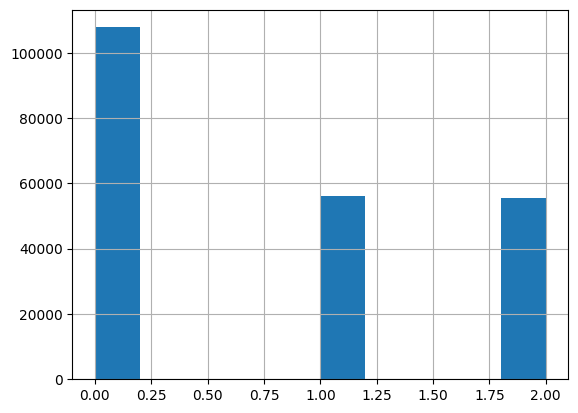

In [5]:
# Оценим соотношение меток
df['mark'].hist()

In [6]:
# перемешаем данные
df = shuffle(df)
# разделим их на тренировочные и тестовые
# Пусть 40% данных будет отведено для тренировки, а 60% будут использованы для тестирования
labeled_reviews, unlabeled_reviews = train_test_split(df, train_size=0.4, random_state=42)

In [7]:
labeled_reviews.head()

,Unnamed: 0,tweets,labels,mark
208977,208977,dragons and healers. chatgpt has truly enlight...,good,1
82071,82071,You can now talk to ChatGPT directly from your...,bad,0
137071,137071,Why should you try chatgpt by @OpenAI?\n\n1. I...,good,1
70308,70308,An interesting read with implications for futu...,neutral,2
94705,94705,You can ask ChatGPT for instructions on how to...,bad,0


In [8]:
unlabeled_reviews.head()

,Unnamed: 0,tweets,labels,mark
197623,197623,#Python code for Infinite monkey theorem.\n\nT...,good,1
79409,79409,I feel like we've have forgotten to Google (or...,good,1
215976,215976,chatgpt is going to put millions out of jobs.\...,bad,0
45069,45069,"I'm trying to see if ChatGPT has hidden state,...",bad,0
78248,78248,This is quite remarkable. It makes me wonder: ...,good,1


In [9]:
# определим функцию для обучения модели
def train_model(labeled_data):
    vect = TfidfVectorizer()
    x = vect.fit_transform(labeled_data['tweets'])
    y = labeled_data['mark']
    model = LogisticRegression()
    model.fit(x, y)
    return model, vect

In [ ]:
# произведем обучение начальной модели на тренировочных данных
model, vect = train_model(labeled_reviews)

In [11]:
# применим модель к тестовым данным для получения прогнозируемых значений
x_unlabeled = vect.transform(unlabeled_reviews['tweets'])
y_unlabeled_pred = model.predict(x_unlabeled)

In [12]:
# вычислим энтропию предсказаний
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainly = - (y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [13]:
uncertainly

array([1.48989729, 1.3886748 , 1.00056835, ..., 1.02163355, 0.61677751,
       0.30318027])

In [14]:
# выберем 100 неопределенных данных произведём маркировку вручную с помощью инструмента
labeled_reviews_new = unlabeled_reviews.iloc[uncertainly.argsort()[:100]]
unlabeled_reviews_new = unlabeled_reviews.iloc[uncertainly.argsort()[100:]]

In [22]:
labeled_reviews_new

,Unnamed: 0,tweets,labels,mark
97336,97336,ChatGPT is amazing. Fun. ☺️,good,1
9562,9562,Holiday fun with ChatGPT. Kind of amazing... h...,good,1
203318,203318,I love ChatGpt. You’re the best @zynaaaab,good,1
47868,47868,ChatGPT is pretty funny and impressive! Wow 🤯,good,1
60904,60904,ChatGPT is AMAZING!!! AWESOME!!! https://t.co/...,good,1
...,...,...,...,...
17750,17750,ChatGPT🔥,bad,0
91931,91931,ChatGPT ❤️,bad,0
195805,195805,ChatGPT 👍,bad,0
35816,35816,ChatGPT,bad,0


In [16]:
# соединим размеченные вручную данные с тренировочным множеством
labeled_reviews = pd.concat([labeled_reviews, labeled_reviews_new])
labeled_reviews

,Unnamed: 0,tweets,labels,mark
208977,208977,dragons and healers. chatgpt has truly enlight...,good,1
82071,82071,You can now talk to ChatGPT directly from your...,bad,0
137071,137071,Why should you try chatgpt by @OpenAI?\n\n1. I...,good,1
70308,70308,An interesting read with implications for futu...,neutral,2
94705,94705,You can ask ChatGPT for instructions on how to...,bad,0
...,...,...,...,...
17750,17750,ChatGPT🔥,bad,0
91931,91931,ChatGPT ❤️,bad,0
195805,195805,ChatGPT 👍,bad,0
35816,35816,ChatGPT,bad,0


In [ ]:
# переобучим модель уже на новых данных
model, vectorized = train_model(labeled_reviews)

In [18]:
reviews_test = unlabeled_reviews
reviews_test

,Unnamed: 0,tweets,labels,mark
197623,197623,#Python code for Infinite monkey theorem.\n\nT...,good,1
79409,79409,I feel like we've have forgotten to Google (or...,good,1
215976,215976,chatgpt is going to put millions out of jobs.\...,bad,0
45069,45069,"I'm trying to see if ChatGPT has hidden state,...",bad,0
78248,78248,This is quite remarkable. It makes me wonder: ...,good,1
...,...,...,...,...
186430,186430,"Apparently, #ChatGPT by @OpenAI not only prohi...",bad,0
78975,78975,"Yes, we all know ChatGPT took 5 days to reach ...",neutral,2
42431,42431,#ChatGPT gets approval by it's predecessors. h...,neutral,2
80432,80432,#ChatGPT Not familiar with itself https://t.co...,bad,0


оценим качество модели на тестовом датасете

In [19]:
x_test = vectorized.transform(reviews_test['tweets'])
x_test

<131577x125640 sparse matrix of type '<class 'numpy.float64'>'
	with 2513595 stored elements in Compressed Sparse Row format>

In [20]:
y_test_pred = model.predict(x_test)
y_test_pred

array([2, 1, 0, ..., 0, 0, 0])

In [21]:
f1 = f1_score(reviews_test['mark'], y_test_pred, average='weighted')
f1

0.8070125576686759

Модель была улучшена до 80% эффективности за счёт наиболее подходяще заданных тренировочных и тестовых данных.

Наличие в твитах одних лишь эмодзи не рассматривается как положительный отзыв.

Вывод: в результате проделанной работы были выполнены следующие задачи:
* Были автоматически присвоены метки данным на основе определенных критериев.
* Данные были разделены на тренировочные  и тестовые
* Модель была предварительно обучена
* Новые данные были добавлены в обучающую выборку
* Модель была обучена на новых данных
* Произведена оценка качества модели <br><br>

